# Status Mission Prediction

## 1. Problem Statement
 This project aim to understand how the Status Mission is affected by other variables such as Company, Country, Ownership and many other possible variables to be discover. 

## 2. Data Collection & Description
- **Data Source:** [One Small Step for Data](https://www.kaggle.com/datasets/davidroberts13/one-small-step-for-data)
- **Data Shape:** Rows: 4324, Columns: 15

#### Columns:
- **Company Name:** Name of the organization responsible for the launch.
- **Location:** String format of the launch location.
- **Detail:** Specifics of each Rocket Cost.
- **Status Rocket Cost:** Indicates if a Rocket Cost is currently in use.
- **Rocket Cost:** Cost in millions of the Rocket Cost used.
- **Status Mission:** Categorical element showing the result of the launch.
- **Country of Launch:** The country where the launch took place.
- **Company's Country of Origin:** The country that the organization is from.
- **Private or State Run:** The organization's category (e.g., SpaceX for private, NASA for State).
- **DateTime:** Date and time of the launch.


## 2.1 Import Data and Packages

In [3]:
import numpy as np
import pandas as pd
import csv
import os
import sys
#sys.path.append('../src')
#from utilities import utility as ut
from src.utilities import utility as ut
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import set_config
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime
from geopy.geocoders import ArcGIS

ModuleNotFoundError: No module named 'src'

### Import CSV Data as Panda DataFrame

In [ ]:
data_file_path = '../data/raw/global_space_launches.csv'
df = pd.read_csv(data_file_path)
pd.options.mode.copy_on_write = True
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,S,1958-02-05 07:33:00+00:00,1958,2,5,05/02/1958,07:33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,S,1958-02-01 03:48:00+00:00,1958,2,1,01/02/1958,03:48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,S,1957-12-06 16:44:00+00:00,1957,12,6,06/12/1957,16:44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1957-11-03 02:30:00+00:00,1957,11,3,03/11/1957,02:30


## 3. Data Checks to Perform

## 3.1 Columns Cleanliness & Readability

In [ ]:
# Renaming long names
rename_dict = {'Company Name': 'Company',
               ' Rocket': 'Rocket Cost',
               'Country of Launch': 'Launch Country', 
               'Companys Country of Origin': 'Company Origin', 
               'Private or State Run': 'Ownership'}
df.rename(columns=rename_dict, inplace=True)

## 3.2 Check Missing Values

In [ ]:
df.isna().sum()

Company              0
Location             0
Detail               0
Status Rocket        0
Rocket Cost       3360
Status Mission       0
Launch Country       0
Company Origin       0
Ownership            0
DateTime             0
Year                 0
Month                0
Day                  0
Date                 0
Time                 0
dtype: int64

There are missing values for Rocket Cost column

## 3.3 Check Duplicates

In [ ]:
df.duplicated().sum()

1

In [ ]:
# Drop dupplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

## 3.4 Check Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         4323 non-null   object
 1   Location        4323 non-null   object
 2   Detail          4323 non-null   object
 3   Status Rocket   4323 non-null   object
 4   Rocket Cost     963 non-null    object
 5   Status Mission  4323 non-null   object
 6   Launch Country  4323 non-null   object
 7   Company Origin  4323 non-null   object
 8   Ownership       4323 non-null   object
 9   DateTime        4323 non-null   object
 10  Year            4323 non-null   int64 
 11  Month           4323 non-null   int64 
 12  Day             4323 non-null   int64 
 13  Date            4323 non-null   object
 14  Time            4323 non-null   object
dtypes: int64(3), object(12)
memory usage: 540.4+ KB


## 3.5 Check Unique Values

In [ ]:
# Count the number of unique values in each column 
df.nunique()

Company             55
Location           137
Detail            4278
Status Rocket        2
Rocket Cost         56
Status Mission       4
Launch Country      16
Company Origin      17
Ownership            2
DateTime          4319
Year                64
Month               12
Day                 31
Date              3922
Time              1273
dtype: int64

## 3.6 Check Statistics

In [ ]:
df.describe(include='all')

,Company,Location,Detail,Status Rocket,Rocket Cost,Status Mission,Launch Country,Company Origin,Ownership,DateTime,Year,Month,Day,Date,Time
count,4323,4323,4323,4323,963,4323,4323,4323,4323,4323,4323.000000,4323.000000,4323.000000,4323,4323
unique,55,137,4278,2,56,4,16,17,2,4319,NaN,NaN,NaN,3922,1273
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success,Russia,Russia,S,1991-08-25 08:40:00+00:00,NaN,NaN,NaN,26/04/1962,00:00
freq,1777,235,6,3534,136,3878,1398,2064,2930,2,NaN,NaN,NaN,4,135
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.381911,6.753181,16.441591,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.071932,3.416812,8.635934,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972.000000,4.000000,9.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984.000000,7.000000,17.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,10.000000,24.000000,NaN,NaN


## 3.7 Check Categories

In [ ]:
# Define numerical & categorical columns
initial_numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
initial_categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print('There are possible {} numerical features: {}\n'.format(len(initial_numerical_features), initial_numerical_features))
print('There are possible {} categorical features: {}'.format(len(initial_categorical_features), initial_categorical_features))

There are possible 3 numerical features: ['Year', 'Month', 'Day']

There are possible 12 categorical features: ['Company', 'Location', 'Detail', 'Status Rocket', 'Rocket Cost', 'Status Mission', 'Launch Country', 'Company Origin', 'Ownership', 'DateTime', 'Date', 'Time']


## 4. Handling Various Features

#### Handling Missing Value 

In [ ]:
# Adding NA column {isna:1}
df['Rocket Cost_isna'] = np.where(df['Rocket Cost'].isna(), 1, 0)

# Convert everything to strings and delete commas
df['Rocket Cost'] = df['Rocket Cost'].astype(str).str.replace(',', '').astype(float)

#### Handling Date Feature

In [ ]:
df.loc[:,'isWeekend'] = ut.is_weekend(df['Date'])
print(df['isWeekend'].unique())

[0 1]


#### Handling Month & Day Feature

In [ ]:
df.loc[:,'Season'] = ut.get_season(df['Date'])
print(df['Season'].unique())

df.loc[:, 'Quarter'] = ut.get_quarter(df['Date'])
print(df['Quarter'].unique())

['Summer' 'Spring' 'Winter' 'Autumn']
['Q3' 'Q2' 'Q1' 'Q4']


c:\Users\Lepaulhz\project\mission-status-prediction\notebooks\../src/utilities\utility.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Winter' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  season[is_winter] = 'Winter'
c:\Users\Lepaulhz\project\mission-status-prediction\notebooks\../src/utilities\utility.py:189: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Q1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  quarter[is_q1] = 'Q1'


In [ ]:
one_hot_datetime = pd.get_dummies(df[['Season','Quarter']]).astype(int)
df = df.join(one_hot_datetime)

#### Handling Status Rocket Cost & Ownership Binary Feature

In [ ]:
status_rocket_dict = {'Status Rocket': {'StatusActive': 1, 'StatusRetired': 0}}

for feature, bin_map in status_rocket_dict.items():
    df.loc[:, 'isActive'] = df[feature].map(bin_map)
    
ownership_dict = {'Ownership': {'S': 1, 'P': 0}}

for feature, bin_map in ownership_dict.items():
    df.loc[:, 'isStateRun'] = df[feature].map(bin_map)

#### Handling Company Origin & Launch Country Feature

In [ ]:
company_countries = df['Company Origin'].unique()
launch_countries = df['Launch Country'].unique()

# Concat two countries features together and create unique array
countries = np.unique(np.concatenate((company_countries, launch_countries)))

# Verifying by finding the intesecting between two arrays
intersecting_countries = np.intersect1d(company_countries, launch_countries)
if len(countries) == len(company_countries)+len(launch_countries)-len(intersecting_countries):
    print(f'Array countries succesfully verified. There are {len(countries)} unique countries.')

Array countries succesfully verified. There are 23 unique countries.


In [ ]:
def get_country_coord(country_name):
    """
    Retrieves the latitude and longitude coordinates of a given country using geocoding.

    Parameters:
    country_name (str): The name of the country to retrieve the coordinates.

    Returns:
    tuple or None: A tuple containing the latitude and longitude coordinates of the country,
                   or None if the country name is invalid or cannot be geocoded.

    Notes:
    - This function uses geocoding to find the coordinates of the given country name.
    - If the country name is valid and geocoding is successful, the latitude and longitude
      coordinates are returned as a tuple.
    - If the country name is invalid or geocoding fails, the function returns None.

    Example:
    >>> get_country_coord('United States')
    (39.398703156, -99.41461919)
    """
    geolocator = ArcGIS()
    location = geolocator.geocode(country_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None  

In [ ]:
# Create an empty dict then append the coordinate from each country into the dict
coord_dict = {}
for country in countries:
    coordinates = get_country_coord(country)
    coord_dict[country] = [coordinates[0], coordinates[1]]

In [ ]:
# Create a DataFrame by mapping the country features using the coord_dict
# Assign the resulting list of coordinates to two new columns for Lat. and Long.
df[['Company Origin Lat','Company Origin Long']] = pd.DataFrame(df['Company Origin'].map(coord_dict).to_list(), index=df.index)
df[['Launch Country Lat','Launch Country Long']] = pd.DataFrame(df['Launch Country'].map(coord_dict).to_list(), index=df.index)

#### Handling DateTime Feature

In [ ]:
# Convert object to Timestamp object with UTC Offset %z
date_time_object = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S%z")

# Convert Timestamp object to Unix timestamp (seconds since Unix epoch)
df.loc[:,'Unix Time'] = (date_time_object - pd.Timestamp('1970-01-01', tz='UTC')).dt.total_seconds()

#### Handling Cyclical DateTime Feature

In [ ]:
hr = 60*60
day = hr*24
year = day*365.25

column_names = ['Hour', 'Day', 'Year']
time_units = [hr, day, year]  

for column_name, time_unit in zip(column_names, time_units):
    df[column_name + 'Sine'] = np.sin(df['Unix Time'] * 2 * np.pi / time_unit)
    df[column_name + 'Cosine'] = np.cos(df['Unix Time'] * 2 * np.pi / time_unit)

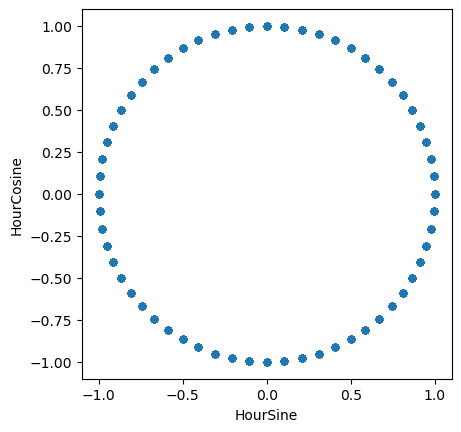

In [ ]:
df.plot.scatter('HourSine', 'HourCosine').set_aspect('equal')

#### Handling Company Categorical Feature

In [ ]:
one_hot_company = pd.get_dummies(df[['Company']]).astype(int)
df = df.join(one_hot_company)

#### Handling Location Text Feature

In [ ]:
split_locations = df['Location'].str.split(',', expand=True)

In [ ]:
split_locations[2].unique()

array([' Florida', ' China', ' Texas', ' Kazakhstan', ' Japan',
       ' Virginia', ' Israel', ' New Zealand', None, ' California',
       ' Russia', ' French Guiana', ' Iran', ' India', ' New Mexico',
       ' North Korea', ' Pacific Missile Range Facility',
       ' Pacific Ocean', ' South Korea', ' Marshall Islands', ' Alaska',
       ' Barents Sea', ' Maranh?œo', ' Gran Canaria', ' Kenya',
       ' Australia', ' Algeria'], dtype=object)

#### Handling Status Mission Target Feature

In [ ]:
df.loc[:, 'isMissionSuccess'] = (df['Status Mission'] == 'Success').astype(int)
df['isMissionSuccess'].unique()

array([1, 0])

## 5. New DataFrame

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['Company', 'Location', 'Detail', 'Status Rocket', 'Rocket Cost',
       'Status Mission', 'Launch Country', 'Company Origin', 'Ownership',
       'DateTime', 'Year', 'Month', 'Day', 'Date', 'Time', 'Rocket Cost_isna',
       'isWeekend', 'Season', 'Quarter', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Quarter_Q1', 'Quarter_Q2',
       'Quarter_Q3', 'Quarter_Q4', 'isActive', 'isStateRun',
       'Company Origin Lat', 'Company Origin Long', 'Launch Country Lat',
       'Launch Country Long', 'Unix Time', 'HourSine', 'HourCosine', 'DaySine',
       'DayCosine', 'YearSine', 'YearCosine', 'Company_AEB', 'Company_AMBA',
       'Company_ASI', 'Company_Arianespace', 'Company_Arme de l'Air',
       'Company_Blue Origin', 'Company_Boeing', 'Company_CASIC',
       'Company_CECLES', 'Company_CNES', 'Company_Douglas', 'Company_EER',
       'Company_ESA', 'Company_Eurockot', 'Company_ExPace', 'Company_Exos',
       'Company_General Dynamics', 'Company_IAI', 'Co

In [ ]:
company_col = df.filter(like='Company_')
df_new = df[['Rocket Cost','Rocket Cost_isna', 'isActive', 'isStateRun',
             'Year', 'Month', 'Day', 'Unix Time', 'isWeekend',
             'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 
             'Quarter_Q1', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4',
             'HourSine', 'HourCosine', 'DaySine', 'DayCosine', 'YearSine', 'YearCosine',
             'Company Origin Lat', 'Company Origin Long', 'Launch Country Lat', 'Launch Country Long', 'isMissionSuccess']]
df_new = pd.concat([df_new, company_col], axis=1)
print(len(df_new.columns))

83


In [ ]:
df_new

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
0,50.00,0,1,0,2020,8,7,1.596777e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
1,29.75,0,1,1,2020,8,6,1.596686e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,1,0,2020,8,4,1.596585e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
3,65.00,0,1,1,2020,7,30,1.596144e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
4,145.00,0,1,0,2020,7,30,1.596110e+09,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,NaN,1,0,1,1958,2,5,-3.756400e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,NaN,1,0,1,1958,2,1,-3.759991e+08,1,0,...,0,0,0,0,0,0,0,0,0,0
4321,NaN,1,0,1,1957,12,6,-3.808774e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,NaN,1,0,1,1957,11,3,-3.837798e+08,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
0,50.00,0,1,0,2020,8,7,1.596777e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
1,29.75,0,1,1,2020,8,6,1.596686e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,1,0,2020,8,4,1.596585e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
3,65.00,0,1,1,2020,7,30,1.596144e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
4,145.00,0,1,0,2020,7,30,1.596110e+09,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,NaN,1,0,1,1958,2,5,-3.756400e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,NaN,1,0,1,1958,2,1,-3.759991e+08,1,0,...,0,0,0,0,0,0,0,0,0,0
4321,NaN,1,0,1,1957,12,6,-3.808774e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,NaN,1,0,1,1957,11,3,-3.837798e+08,1,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

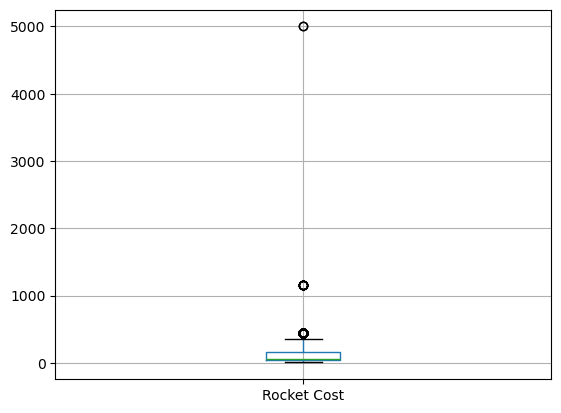

In [ ]:
df_new.boxplot(column='Rocket Cost')

In [ ]:
quartile1, quartile3 = df_new['Rocket Cost'].quantile(0.25), df_new['Rocket Cost'].quantile(0.75)
IQR = quartile3-quartile1
outliers = df_new[(df_new['Rocket Cost']<(quartile1-1.5*IQR)) | (df_new['Rocket Cost']>(quartile3+1.5*IQR))]

print(len(outliers))
print(np.unique(outliers['Rocket Cost'], return_counts=True))

151
(array([ 450., 1160., 5000.]), array([136,  13,   2], dtype=int64))


## 6. Preprocessor

In [ ]:
# Separate minority & majority class then sample them equally
minority_data_sample = df_new[~df_new['isMissionSuccess'].astype(bool)].sample(25, random_state=42)
majority_data_sample = df_new[df_new['isMissionSuccess'].astype(bool)].sample(25, random_state=42)

# Concat two dataframes into one train data then shuffle them
df_test = pd.concat([minority_data_sample, majority_data_sample]).sample(frac=1, random_state=42)
df_train = df_new.drop(index = df_test.index)

In [ ]:
df_train

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
0,50.00,0,1,0,2020,8,7,1.596777e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
1,29.75,0,1,1,2020,8,6,1.596686e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,1,0,2020,8,4,1.596585e+09,0,0,...,1,0,0,0,0,0,0,0,0,0
3,65.00,0,1,1,2020,7,30,1.596144e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
4,145.00,0,1,0,2020,7,30,1.596110e+09,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,NaN,1,0,1,1958,2,5,-3.756400e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,NaN,1,0,1,1958,2,1,-3.759991e+08,1,0,...,0,0,0,0,0,0,0,0,0,0
4321,NaN,1,0,1,1957,12,6,-3.808774e+08,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,NaN,1,0,1,1957,11,3,-3.837798e+08,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
3892,NaN,1,0,1,1966,3,27,-118860000.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2007,NaN,1,0,1,1987,3,18,543054600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2933,NaN,1,0,1,1975,5,21,169887540.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3602,NaN,1,0,1,1968,12,26,-32019300.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3483,NaN,1,0,1,1970,3,17,6520200.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Handling Rocket Cost Feature Imputation

In [ ]:
mean_value = df_train['Rocket Cost'].mean()
median_value = df_train['Rocket Cost'].median()
mode_value = df_train['Rocket Cost'].mode()[0]

numerical_pipeline =  Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=mean_value)),  
                                ('scaler', StandardScaler())])
imp_strat = median_value

#### Data Transformation

In [ ]:
# Get columns with only binary values (0 or 1)
binary_columns = df_new.columns[df_new.isin([0, 1]).all()]

# Get columns with non-binary values
non_binary_columns = df_new.columns[~df_new.isin([0, 1]).all()]

# Exclude target variable
no_target_variable = df_new.columns[df_new.columns != 'isMissionSuccess']

In [ ]:
binary_columns, len(binary_columns), non_binary_columns, len(non_binary_columns)

(Index(['Rocket Cost_isna', 'isActive', 'isStateRun', 'isWeekend',
        'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
        'Quarter_Q1', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4',
        'isMissionSuccess', 'Company_AEB', 'Company_AMBA', 'Company_ASI',
        'Company_Arianespace', 'Company_Arme de l'Air', 'Company_Blue Origin',
        'Company_Boeing', 'Company_CASIC', 'Company_CECLES', 'Company_CNES',
        'Company_Douglas', 'Company_EER', 'Company_ESA', 'Company_Eurockot',
        'Company_ExPace', 'Company_Exos', 'Company_General Dynamics',
        'Company_IAI', 'Company_ILS', 'Company_IRGC', 'Company_ISA',
        'Company_ISAS', 'Company_ISRO', 'Company_JAXA', 'Company_KARI',
        'Company_KCST', 'Company_Khrunichev', 'Company_Kosmotras',
        'Company_Land Launch', 'Company_Landspace', 'Company_Lockheed',
        'Company_MHI', 'Company_MITT', 'Company_Martin Marietta',
        'Company_NASA', 'Company_Northrop', 'Company_OKB-586',
       

In [ ]:
# Impute missing values in specified columns 
df_train.loc[:,'Rocket Cost'] = df_train['Rocket Cost'].fillna(imp_strat)

# Scale the data
df_train.loc[:, non_binary_columns] =(df_train[non_binary_columns]-df_train[non_binary_columns].mean())/df_train[non_binary_columns].std()

# Scale the data without the target variable
#df_train.loc[:, no_target_variable] =(df_train[no_target_variable]-df_train[no_target_variable].mean())/df_train[no_target_variable].std()
df_train

C:\Users\Lepaulhz\AppData\Local\Temp\ipykernel_25120\3666243349.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       1.802534
1       1.802534
2       1.802534
3       1.802534
4       1.802534
          ...   
4319   -1.629066
4320   -1.629066
4321   -1.684415
4322   -1.684415
4323   -1.684415
Name: Year, Length: 4273, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, non_binary_columns] =(df_train[non_binary_columns]-df_train[non_binary_columns].mean())/df_train[non_binary_columns].std()
C:\Users\Lepaulhz\AppData\Local\Temp\ipykernel_25120\3666243349.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.363201
1       0.363201
2       0.363201
3       0.070765
4       0.070765
          ...   
4319   -1.391417
4320   -1.391417
4321    1.532947
4322    1.2405

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
0,-0.228962,0,1,0,1.802534,0.363201,-1.092511,1.807111,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.371578,0,1,1,1.802534,0.363201,-1.208247,1.806952,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.144449,1,1,0,1.802534,0.363201,-1.439718,1.806775,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.123321,0,1,1,1.802534,0.070765,1.569402,1.806001,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.440100,0,1,0,1.802534,0.070765,1.569402,1.805941,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,-0.144449,1,0,1,-1.629066,-1.391417,-1.323982,-1.652815,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,-0.144449,1,0,1,-1.629066,-1.391417,-1.786924,-1.653445,1,0,...,0,0,0,0,0,0,0,0,0,0
4321,-0.144449,1,0,1,-1.684415,1.532947,-1.208247,-1.662002,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,-0.144449,1,0,1,-1.684415,1.240511,-1.555453,-1.667094,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.columns[df_train.isna().any()].to_list()

[]

In [ ]:
# Impute missing values in specified columns 
df_test.loc[:,'Rocket Cost'] = df_test['Rocket Cost'].fillna(imp_strat)

# Scale the data only non binary columns
df_test.loc[:, non_binary_columns] =(df_test[non_binary_columns]-df_test[non_binary_columns].mean())/df_test[non_binary_columns].std()

# Scale the data without the target variable
#df_test.loc[:, no_target_variable] =(df_test[no_target_variable]-df_test[no_target_variable].mean())/df_test[no_target_variable].std()
df_test.tail()

C:\Users\Lepaulhz\AppData\Local\Temp\ipykernel_25120\4047210139.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3892   -0.939802
2007    0.219766
2933   -0.442844
3602   -0.829367
3483   -0.718932
2601   -0.277192
4105   -1.160672
4205   -1.215890
1022    1.103246
1157    0.937593
4179   -1.160672
1032    1.103246
350     1.876291
4154   -1.160672
4277   -1.326325
2945   -0.442844
1707    0.495853
2974   -0.498062
2812   -0.387627
4258   -1.271107
4038   -1.050237
1136    0.992811
1574    0.606288
3304   -0.663715
2921   -0.442844
3758   -0.884585
2020    0.219766
2460   -0.166757
2274   -0.001104
414     1.821074
2408   -0.111539
2097    0.109331
762     1.434551
4131   -1.160672
127     1.986726
1593    0.606288
35      2.041944
3876   -0.939802
1335    0.827158
1465    0.716723
856     1.324116
1300    0.827158
4259   -1.271107
3942   -0.995020
2392   -0.111539
1202    0.937593
1098    1.048028
4237   -1.271

,Rocket Cost,Rocket Cost_isna,isActive,isStateRun,Year,Month,Day,Unix Time,isWeekend,Season_Autumn,...,Company_SpaceX,Company_Starsem,Company_ULA,Company_US Air Force,Company_US Navy,Company_UT,Company_VKS RF,Company_Virgin Orbit,Company_Yuzhmash,Company_i-Space
1202,-0.222772,1,1,0,0.937593,-1.050619,-0.552388,0.923485,1,0,...,0,0,0,0,0,0,0,0,0,0
1098,-0.222772,1,0,0,1.048028,-0.736063,-0.072051,1.039437,0,0,...,0,0,0,0,0,0,0,0,0,0
4237,-0.222772,1,0,0,-1.271107,1.780391,-0.192135,-1.247903,0,0,...,0,0,0,0,0,0,0,0,0,0
2684,-0.222772,1,0,1,-0.332409,0.207607,0.408287,-0.329649,0,0,...,0,0,0,0,0,0,0,0,0,0
2243,-0.222772,1,0,1,-0.001104,1.151278,-1.392978,0.013990,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.columns[df_test.isna().any()].to_list()

[]

In [ ]:
X_train = df_train.drop('isMissionSuccess', axis=1).values
y_train = df_train['isMissionSuccess'].values
X_train.shape, y_train.shape

((4273, 82), (4273,))

In [ ]:
df_train['isMissionSuccess'].value_counts()

isMissionSuccess
1    3853
0     420
Name: count, dtype: int64

In [ ]:
X_test = df_test.drop('isMissionSuccess', axis=1).values
y_test = df_test['isMissionSuccess'].values
X_test.shape, y_test.shape

((50, 82), (50,))

In [ ]:
company_columns = [c for c in df_test.columns if c.startswith('Company_')]

In [ ]:
df_test[company_columns].sum()

Company_AEB                  1
Company_AMBA                 0
Company_ASI                  0
Company_Arianespace          4
Company_Arme de l'Air        0
Company_Blue Origin          0
Company_Boeing               0
Company_CASIC                2
Company_CECLES               0
Company_CNES                 0
Company_Douglas              0
Company_EER                  0
Company_ESA                  0
Company_Eurockot             0
Company_ExPace               0
Company_Exos                 1
Company_General Dynamics     7
Company_IAI                  1
Company_ILS                  0
Company_IRGC                 1
Company_ISA                  0
Company_ISAS                 0
Company_ISRO                 1
Company_JAXA                 0
Company_KARI                 0
Company_KCST                 0
Company_Khrunichev           0
Company_Kosmotras            0
Company_Land Launch          0
Company_Landspace            0
Company_Lockheed             1
Company_MHI                  0
Company_

## 7. Model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

c:\Users\Lepaulhz\anaconda3\envs\mission-status-prediction-env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
matrix_train = confusion_matrix(y_train_pred, y_train)
matrix_train

array([[  34,   12],
       [ 386, 3841]], dtype=int64)

In [ ]:
matrix_test = confusion_matrix(y_test_pred, y_test)
matrix_test

array([[ 2,  0],
       [23, 25]], dtype=int64)

In [ ]:
metrics_train = ut.decipher_confusion_matrix(matrix_train)
print('Train Metrics:\n')
print('Actual Failure Predicted Failure (TN):', metrics_train[0])
print('Actual Failure Predicted Success (FP):', metrics_train[1])
print('Actual Success Predicted Failure (FN):', metrics_train[2])
print('Actual Success Predicted Success (TP):', metrics_train[3])
print('Accurary:', metrics_train[4])
print('Precision:', metrics_train[5])
print('Recall:', metrics_train[6])
print('F1:', metrics_train[7])

Train Metrics:

Actual Failure Predicted Failure (TN): 34
Actual Failure Predicted Success (FP): 12
Actual Success Predicted Failure (FN): 386
Actual Success Predicted Success (TP): 3841
Accurary: 0.906857009127077
Precision: 0.9968855437321568
Recall: 0.9086822805772415
F1: 0.9507425742574258


In [ ]:
metrics_test = ut.decipher_confusion_matrix(matrix_test)
print('Test Metrics:\n')
print('Actual Failure Predicted Failure (TN):', metrics_test[0])
print('Actual Failure Predicted Success (FP):', metrics_test[1])
print('Actual Success Predicted Failure (FN):', metrics_test[2])
print('Actual Success Predicted Success (TP):', metrics_test[3])
print('Accurary:', metrics_test[4])
print('Precision:', metrics_test[5])
print('Recall:', metrics_test[6])
print('F1:', metrics_test[7])

Test Metrics:

Actual Failure Predicted Failure (TN): 2
Actual Failure Predicted Success (FP): 0
Actual Success Predicted Failure (FN): 23
Actual Success Predicted Success (TP): 25
Accurary: 0.54
Precision: 1.0
Recall: 0.5208333333333334
F1: 0.684931506849315


## 7. Record

In [ ]:
note = ''
observe = ''
action = ''

In [ ]:
csv_file = 'test_metric_logreg.csv'

# Create a dictionary with the variables
row = {
    'Timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'True Negative': metrics_test[0],
    'False Positive': metrics_test[1],
    'False Negative': metrics_test[2],
    'True Positive': metrics_test[3],
    'Accuracy': metrics_test[4],
    'Precision': metrics_test[5],
    'Recall': metrics_test[6],
    'F1': metrics_test[7],
    'Note': note,
    'Observation': observe,
    'Action': action
}